In [207]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score

df = pd.read_csv("Wellbeing_and_lifestyle_data_Kaggle.csv")


## Choosing variables and training the model.

In [209]:
df.drop(columns=['Timestamp', 'DAILY_STRESS', 'AGE', 'GENDER'], inplace=True)
df.head()


,FRUITS_VEGGIES,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,TODO_COMPLETED,FLOW,DAILY_STEPS,LIVE_VISION,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,WORK_LIFE_BALANCE_SCORE
0,3,2,5,0,5,2,0,1,6,4,5,0,7,5,5,1,4,0,5,609.5
1,2,4,3,8,10,5,2,2,5,2,5,5,8,2,2,2,3,2,6,655.6
2,2,3,4,4,10,3,2,2,2,2,4,5,8,10,2,2,4,8,3,631.6
3,3,10,3,10,7,2,5,2,3,5,5,0,5,7,5,1,5,2,0,622.7
4,5,3,3,10,4,2,4,2,5,0,5,0,7,0,0,2,8,1,5,663.9


### Assign if a variable is rank variable (zmienne wyrażone na skali rangowej - Spearmana) or quantitive (ilościowe - Pearsona) or qualitative (jakościowe)

* FRUITS_VEGGIES (Quantitive) - HOW MANY FRUITS OR VEGETABLES DO YOU EAT EVERYDAY?
* DAILY_STRESS (Rank variable) - HOW MUCH STRESS DO YOU TYPICALLY EXPERIENCE EVERYDAY?
* PLACES_VISITED (Quantitive) - HOW MANY NEW PLACES DO YOU VISIT?
* CORE_CIRCLE (Quantitive) - HOW MANY PEOPLE ARE VERY CLOSE TO YOU?
* SUPPORTING_OTHERS (Quantitive) - HOW MANY PEOPLE DO YOU HELP ACHIEVE A BETTER LIFE?
* SOCIAL_NETWORK (Quantitive) - WITH HOW MANY PEOPLE DO YOU INTERACT WITH DURING A TYPICAL DAY?
* ACHIEVEMENT(Quantitive) - HOW MANY REMARKABLE ACHIEVEMENTS ARE YOU PROUD OF?
* DONATION (Quantitive) - HOW MANY TIMES DO YOU DONATE YOUR TIME OR MONEY TO GOOD CAUSES?
* BMI_RANGE (Quantitive) - WHAT IS YOUR BODY MASS INDEX (BMI) RANGE?
* TODO_COMPLETED (Rank variable) - HOW WELL DO YOU COMPLETE YOUR WEEKLY TO-DO LISTS?
* FLOW (Quantitive) - IN A TYPICAL DAY, HOW MANY HOURS DO YOU EXPERIENCE "FLOW"?
* DAILY_STEPS(Quantitive) - HOW MANY STEPS (IN THOUSANDS) DO YOU TYPICALLY WALK EVERYDAY?
* LIVE_VISION (Quantitive) - FOR HOW MANY YEARS AHEAD IS YOUR LIFE VISION VERY CLEAR FOR?
* SLEEP_HOURS (Quantitive) - ABOUT HOW LONG DO YOU TYPICALLY SLEEP?
* LOST_VACATION (Quantitive) - HOW MANY DAYS OF VACATION DO YOU TYPICALLY LOSE EVERY YEAR ?
* DAILY_SHOUTING (Rank variable) - HOW OFTEN DO YOU SHOUT OR SULK AT SOMEBODY?
* SUFFICIENT_INCOME (Qualitative) - HOW SUFFICIENT IS YOUR INCOME TO COVER BASIC LIFE EXPENSES?
* PERSONAL_AWARDS (Quantitive) - HOW MANY RECOGNITIONS HAVE YOU RECEIVED IN YOUR LIFE?
* TIME_FOR_PASSION (Quantitive) - HOW MANY HOURS DO YOU SPEND EVERYDAY DOING WHAT YOU ARE PASSIONATE ABOUT?
* WEEKLY_MEDITATION (Quantitive) - IN A TYPICAL WEEK, HOW MANY TIMES DO YOU HAVE THE OPPORTUNITY TO THINK ABOUT YOURSELF?

### Select only quantative variables for correlation of Pearson

In [213]:
quantitive_df = df[["FRUITS_VEGGIES", "PLACES_VISITED", "CORE_CIRCLE", "SUPPORTING_OTHERS", "SOCIAL_NETWORK", "ACHIEVEMENT", "DONATION", "BMI_RANGE", "FLOW", "DAILY_STEPS", "LIVE_VISION", "SLEEP_HOURS", "LOST_VACATION", "PERSONAL_AWARDS", "TIME_FOR_PASSION",
"WEEKLY_MEDITATION"]]

### Check correlations among numerical variables

In [215]:
correlation_matrix = quantitive_df.corr(method='pearson')
round(correlation_matrix ,2)


,FRUITS_VEGGIES,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,FLOW,DAILY_STEPS,LIVE_VISION,SLEEP_HOURS,LOST_VACATION,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION
FRUITS_VEGGIES,1.00,0.25,0.16,0.20,0.11,0.16,0.20,-0.09,0.13,0.25,0.11,0.10,-0.07,0.17,0.16,0.20
PLACES_VISITED,0.25,1.00,0.26,0.24,0.15,0.26,0.20,-0.11,0.14,0.20,0.14,0.13,-0.13,0.27,0.18,0.21
CORE_CIRCLE,0.16,0.26,1.00,0.34,0.31,0.29,0.22,-0.03,0.24,0.15,0.22,0.07,-0.08,0.25,0.23,0.11
SUPPORTING_OTHERS,0.20,0.24,0.34,1.00,0.32,0.36,0.39,0.04,0.28,0.15,0.24,0.01,-0.02,0.33,0.33,0.14
SOCIAL_NETWORK,0.11,0.15,0.31,0.32,1.00,0.25,0.16,0.02,0.24,0.22,0.18,-0.03,0.02,0.21,0.20,-0.01
ACHIEVEMENT,0.16,0.26,0.29,0.36,0.25,1.00,0.23,-0.02,0.39,0.19,0.32,0.05,0.00,0.40,0.37,0.16
DONATION,0.20,0.20,0.22,0.39,0.16,0.23,1.00,0.06,0.17,0.11,0.16,-0.00,-0.02,0.28,0.19,0.14
BMI_RANGE,-0.09,-0.11,-0.03,0.04,0.02,-0.02,0.06,1.00,0.03,-0.13,0.00,-0.10,0.04,0.02,-0.01,-0.08
FLOW,0.13,0.14,0.24,0.28,0.24,0.39,0.17,0.03,1.00,0.14,0.31,0.03,0.01,0.22,0.48,0.14
DAILY_STEPS,0.25,0.20,0.15,0.15,0.22,0.19,0.11,-0.13,0.14,1.00,0.12,0.01,-0.05,0.14,0.14,0.15


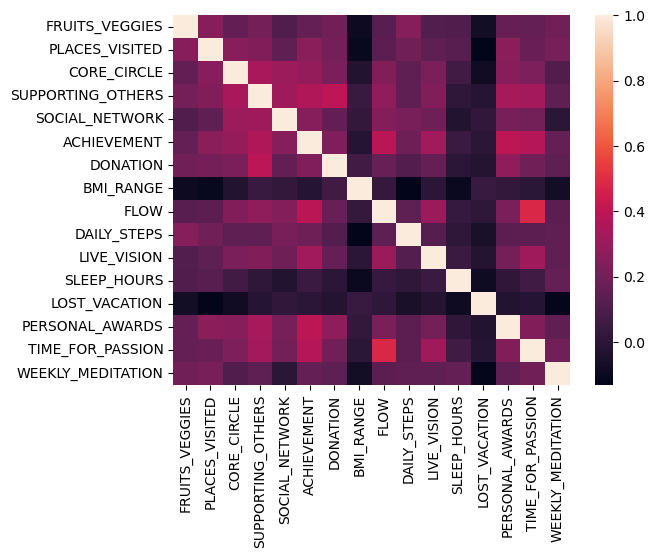

In [216]:
sns.heatmap(correlation_matrix);


## Looking for independent variables

Independent variable is where correlation is below 0.3

In [218]:
independent_pairs = correlation_matrix[correlation_matrix.abs() < 0.3]
round(independent_pairs ,2)

,FRUITS_VEGGIES,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,FLOW,DAILY_STEPS,LIVE_VISION,SLEEP_HOURS,LOST_VACATION,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION
FRUITS_VEGGIES,NaN,0.25,0.16,0.20,0.11,0.16,0.20,-0.09,0.13,0.25,0.11,0.10,-0.07,0.17,0.16,0.20
PLACES_VISITED,0.25,NaN,0.26,0.24,0.15,0.26,0.20,-0.11,0.14,0.20,0.14,0.13,-0.13,0.27,0.18,0.21
CORE_CIRCLE,0.16,0.26,NaN,NaN,NaN,0.29,0.22,-0.03,0.24,0.15,0.22,0.07,-0.08,0.25,0.23,0.11
SUPPORTING_OTHERS,0.20,0.24,NaN,NaN,NaN,NaN,NaN,0.04,0.28,0.15,0.24,0.01,-0.02,NaN,NaN,0.14
SOCIAL_NETWORK,0.11,0.15,NaN,NaN,NaN,0.25,0.16,0.02,0.24,0.22,0.18,-0.03,0.02,0.21,0.20,-0.01
ACHIEVEMENT,0.16,0.26,0.29,NaN,0.25,NaN,0.23,-0.02,NaN,0.19,NaN,0.05,0.00,NaN,NaN,0.16
DONATION,0.20,0.20,0.22,NaN,0.16,0.23,NaN,0.06,0.17,0.11,0.16,-0.00,-0.02,0.28,0.19,0.14
BMI_RANGE,-0.09,-0.11,-0.03,0.04,0.02,-0.02,0.06,NaN,0.03,-0.13,0.00,-0.10,0.04,0.02,-0.01,-0.08
FLOW,0.13,0.14,0.24,0.28,0.24,NaN,0.17,0.03,NaN,0.14,NaN,0.03,0.01,0.22,NaN,0.14
DAILY_STEPS,0.25,0.20,0.15,0.15,0.22,0.19,0.11,-0.13,0.14,NaN,0.12,0.01,-0.05,0.14,0.14,0.15


Example Independent X variables: fruits_veggies, core_circle, places_visited

In [220]:
X = df[['CORE_CIRCLE', 'FRUITS_VEGGIES', 'PLACES_VISITED']]
y = df['WORK_LIFE_BALANCE_SCORE']

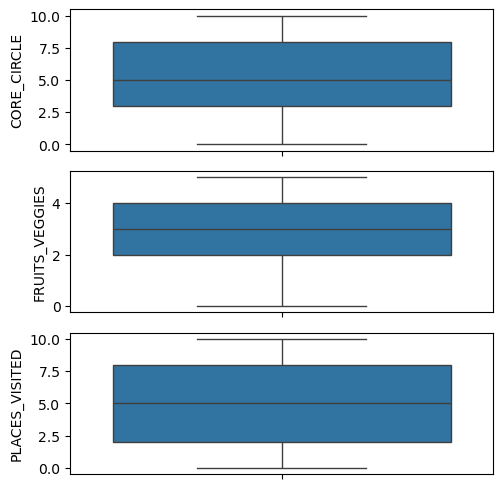

In [221]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(df['CORE_CIRCLE'], ax = axs[0])
plt2 = sns.boxplot(df['FRUITS_VEGGIES'], ax = axs[1])
plt3 = sns.boxplot(df['PLACES_VISITED'], ax = axs[2])

plt.tight_layout()


### Distributions of a values CORE_CIRCLE, ACHIEVEMENT, DAILY_SHOUTING

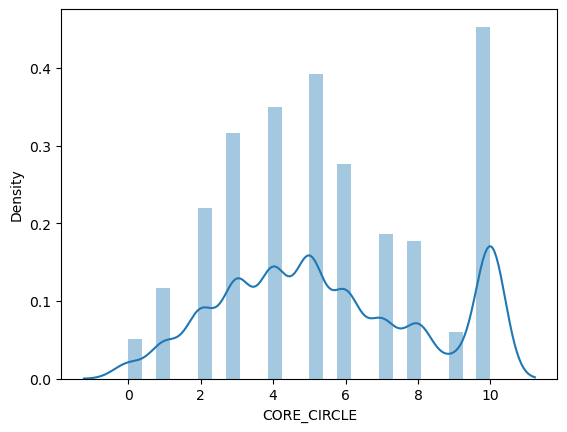

In [223]:
sns.distplot(df['CORE_CIRCLE']);


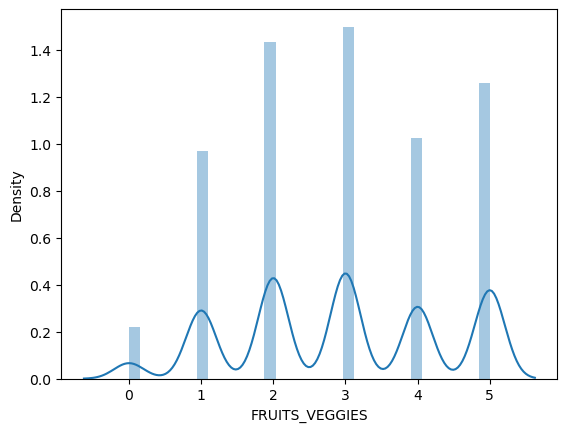

In [224]:
sns.distplot(df['FRUITS_VEGGIES']);

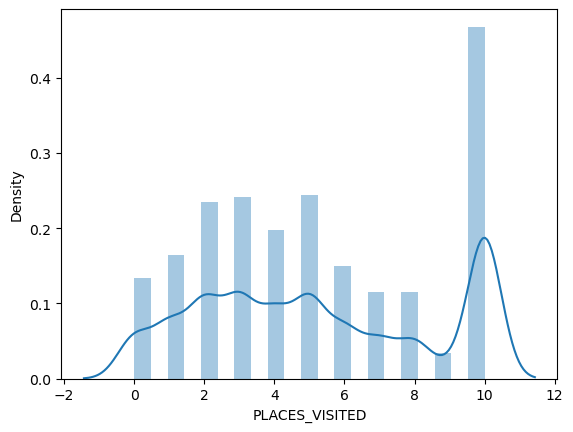

In [225]:
sns.distplot(df['PLACES_VISITED']);

In [226]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)


In [227]:
y_train.shape


(11180,)

In [228]:
y_test.shape


(4792,)

In [229]:
reg_model = linear_model.LinearRegression()
reg_model = LinearRegression().fit(X_train, y_train)

#Printing the model coefficients
print('Intercept: ',reg_model.intercept_)

# pair the feature names with the coefficients
list(zip(X, reg_model.coef_))

Intercept:  580.7723064130367


[('CORE_CIRCLE', 5.868740349518631),
 ('FRUITS_VEGGIES', 9.576565646685845),
 ('PLACES_VISITED', 4.875163769186877)]

In [230]:
y_pred= reg_model.predict(X_test)  
x_pred= reg_model.predict(X_train) 

In [231]:
print("Prediction for test set: {}".format(y_pred))


Prediction for test set: [602.08635276 697.78791325 649.58960922 ... 644.9692501  736.09417583
 673.79166617]


In [232]:
reg_model_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
reg_model_diff

,Actual value,Predicted value
4283,653.7,602.086353
1606,708.1,697.787913
1673,634.2,649.589609
10980,664.9,693.466083
10331,577.0,625.735076
...,...,...
6617,621.8,636.038737
6724,640.7,639.019467
12002,681.3,644.969250
3900,749.7,736.094176


In [233]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)
print('Root Mean Square Error:', r2)

Mean Absolute Error: 25.256981911448385
Mean Square Error: 990.919204292788
Root Mean Square Error: 31.478869171124746


The errors (MAE and RMSE) indicate a moderate level of accuracy. 

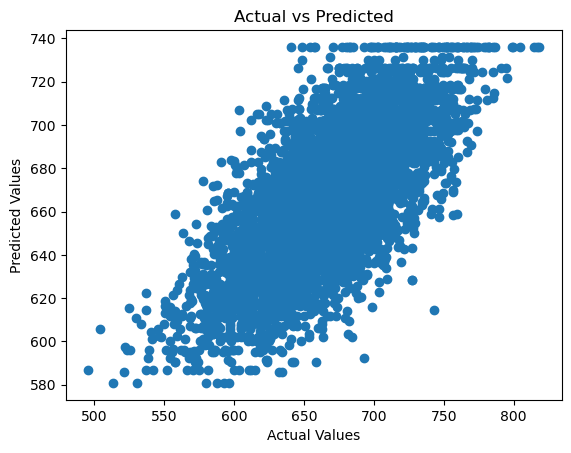

In [235]:
plt.scatter(reg_model_diff['Actual value'], reg_model_diff['Predicted value'])
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.show()

### Looking for dependent variables

Dependent variables is when correlation is above or equal to 0.3

In [237]:
dependent_pairs = correlation_matrix[correlation_matrix.abs() >= 0.3]
round(dependent_pairs ,2)

,FRUITS_VEGGIES,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,FLOW,DAILY_STEPS,LIVE_VISION,SLEEP_HOURS,LOST_VACATION,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION
FRUITS_VEGGIES,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PLACES_VISITED,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CORE_CIRCLE,NaN,NaN,1.00,0.34,0.31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SUPPORTING_OTHERS,NaN,NaN,0.34,1.00,0.32,0.36,0.39,NaN,NaN,NaN,NaN,NaN,NaN,0.33,0.33,NaN
SOCIAL_NETWORK,NaN,NaN,0.31,0.32,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ACHIEVEMENT,NaN,NaN,NaN,0.36,NaN,1.00,NaN,NaN,0.39,NaN,0.32,NaN,NaN,0.40,0.37,NaN
DONATION,NaN,NaN,NaN,0.39,NaN,NaN,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BMI_RANGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FLOW,NaN,NaN,NaN,NaN,NaN,0.39,NaN,NaN,1.00,NaN,0.31,NaN,NaN,NaN,0.48,NaN
DAILY_STEPS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN


Example dependent variables are: 
* CORE_CIRCLE with SUPPORTING_OTHERS, SOCIAL_NETWORK
* ACHIEVEMENT with SUPPORTING_OTHERS, TO_DO_COMPLETED, FLOW, LIVE_VISION, PERSONAL_AWARDS, TIME_FOR_PASSION